# Case Study: Twitter - Circular Economy

## Goals: Extracting topics, extracting relevant hashtags and keywords.

### Key Steps:
1. Splitting the dataset into training and test sets (75% - 25%)
2. Dataset cleaning
3. Corpus cleaning
4. Creating Term-Document Matrices (TDM) and Document-Term Matrices (DTM)
5. Identifying the most frequent terms
6. Word associations
7. Bigrams and trigrams
8. General sentiment analysis
9. Topic identification
10. Sentiment analysis relative to topics
11. Tweet classification based on topics
12. Extraction of the most frequent hashtags


### Libraries

In [2]:
library(tm)
library(topicmodels)
library(qdapTools)
library(BTM)
# library(qdap)
library(ggraph)
library(textplot)
library(concaveman)
library(data.table)
library(stopwords)
library(udpipe)
library(syuzhet)
library(ggthemes)
library(ggplot2)
library(RColorBrewer)
library(wordcloud)
library(dplyr)
library(tidytext)
library(quanteda)
library(stringr)
library(purrr)

Warning message:
"il pacchetto 'tm' è stato creato con R versione 4.2.3"
Caricamento del pacchetto richiesto: NLP

Warning message:
"il pacchetto 'topicmodels' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'qdapTools' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'BTM' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'ggraph' è stato creato con R versione 4.2.3"
Caricamento del pacchetto richiesto: ggplot2

Warning message:
"il pacchetto 'ggplot2' è stato creato con R versione 4.2.3"

Caricamento pacchetto: 'ggplot2'


Il seguente oggetto è mascherato da 'package:NLP':

    annotate


Warning message:
"il pacchetto 'textplot' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'concaveman' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'data.table' è stato creato con R versione 4.2.3"

Caricamento pacchetto: 'data.table'


Il seguente oggetto è mascherato da 'package:qdapTools':

    shi

### 1 - Splitting the dataset into training and test sets (75% - 25%)

In [5]:
# Importing the .csv file
twitter <- read.csv("./CE.csv", stringsAsFactors = FALSE)
names(twitter)
twitter <- unique(twitter) # Removing duplicate tweets

# 75% - 25% (training - testing)
training <- floor(0.75 * nrow(twitter))

# Setting the seed for reproducibility
set.seed(100)

# Creating training and test datasets
index <- sample(seq_len(nrow(twitter)), size = training)
test_twitter <- twitter[-index, ]
training_twitter <- twitter[index, ]
options(max.print=100) # Setting max.print option

[1] "text"       "created"    "screenName"

### 2 - Dataset cleaning

In [10]:
# Cleaning the dataset (removing encoding errors)
test_twitter$text <- gsub("<[^>]+>", "", test_twitter$text)
test_twitter$text <- gsub("<[^>]+><[^>]+>", "", test_twitter$text)
test_twitter$text <- gsub("&amp;", "", test_twitter$text)
test_twitter$text <- gsub("&amp", "", test_twitter$text)
test_twitter$text <- gsub("&", "", test_twitter$text)
test_twitter$text <- gsub("amp", "", test_twitter$text)
test_twitter$text <- gsub("amp;", "", test_twitter$text)
test_twitter$text <- gsub("@[A-Za-z0-9]+", "", test_twitter$text)
test_twitter$text <- gsub("wh", "", test_twitter$text)
test_twitter$text <- gsub("@SchneiderElec", "", test_twitter$text)
test_twitter$text <- gsub("@", "", test_twitter$text)
test_twitter$text <- gsub("SchneiderElec", "", test_twitter$text)
test_twitter$text <- gsub("tweet", "", test_twitter$text)
test_twitter$text <- gsub("tweeted", "", test_twitter$text)
test_twitter$text <- gsub("tweets", "", test_twitter$text)
test_twitter$text <- gsub("1st", "", test_twitter$text)
test_twitter$text <- gsub("anandmahindra", "", test_twitter$text)

### 3 - Corpus cleaning


In [7]:
# Cleaning the corpus
twitter_get <- get_sentences(test_twitter$text)
corpus_review = Corpus(VectorSource(twitter_get)) # Creating the corpus
corpus_review = tm_map(corpus_review, tolower) # Converting text to lowercase
corpus_review = tm_map(corpus_review, removePunctuation) # Removing punctuation
corpus_review = tm_map(corpus_review, removeNumbers) # Removing numbers
stopwords("en") # English stopwords list
corpus_review = tm_map(corpus_review, removeWords, stopwords("english")) # Removing stopwords
my_stopwords <- c("may", "will", "also", "get", "made", "can", 
                  "am", "just", "i", "i'm", "of", "the", "this", 
                  "in", "know", "eriksolheim", "want", "need", 
                  "che", "amp", "check", "just", "read", "circulareconomy", 
                  "circ", "one", "&amp;", "&", ";", "&amp", "wh", "1st")
corpus_review = tm_map(corpus_review, removeWords, my_stopwords) # Removing highly frequent words

# Removing URLs at the end of each tweet
removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
corpus_review <- tm_map(corpus_review, removeURL)
corpus_review <- tm_map(corpus_review, content_transformer(removeURL))

Warning message in tm_map.SimpleCorpus(corpus_review, tolower):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeNumbers):
"transformation drops documents"


[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
 [ reached getOption("max.print") -- omitted 75 entries ]

Warning message in tm_map.SimpleCorpus(corpus_review, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeWords, my_stopwords):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeURL):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, content_transformer(removeURL)):
"transformation drops documents"


### 4 - Creating Term-Document Matrices (TDM) and Document-Term Matrices (DTM)

In [9]:
# Creating Term-Document Matrix (TDM) and Document-Term Matrix (DTM)
review_tdm <- TermDocumentMatrix(corpus_review, control=list(wordlength=c(1,Inf), weighting = weightTfIdf))
review_dtm <- DocumentTermMatrix(corpus_review, control=list(wordlength=c(1,Inf), weighting = weightTfIdf))

# Converting TDM to a matrix
review_m <- as.matrix(review_tdm)

Warning message in TermDocumentMatrix.SimpleCorpus(corpus_review, control = list(wordlength = c(1, :
"custom functions are ignored"
Warning message in weighting(x):
"empty document(s): 74 175 177 213 276 285 319 353 388 392 400 414 418 428 430 677 689 727 729 784 786 794 988 1001 1003 1115 1118 1130 1145 1151 1167 1179 1209 1271 1281 1287 1292 1313 1320 1344 1356 1368 1376 1385 1420 1461 1490 1514 1542 1555 1610 1617 1620 1633 1652 1701 1728 1734 1757 1763 1807 1813 1899 1902 1919 1931 1980 2007 2024 2030 2039 2043 2045 2047 2053 2056 2059 2068 2074 2085 2099 2103 2111 2113 2115 2118 2120 2125 2129 2133 2136 2138 2140 2192 2198 2232 2235 2242 2252 2254 2256 2261 2266 2304 2306 2312 2313 2324 2334 2356 2360 2362 2365 2388 2394 2409 2431 2433 2438 2446 2450 2454 2482 2486 2491 2499 2516 2528 2533 2541 2561 2569 2577 2579 2580 2581 2584 2585 2596 2599 2609 2615 2652 2663 2681 2686 2699 2732 2793 2808 2879 2938 2985 2987 3005 3015 3033 3037 3041 3045 3048 3053 3078 3109 3115 3131 3145 3157

### 5 - Identifying the most frequent terms


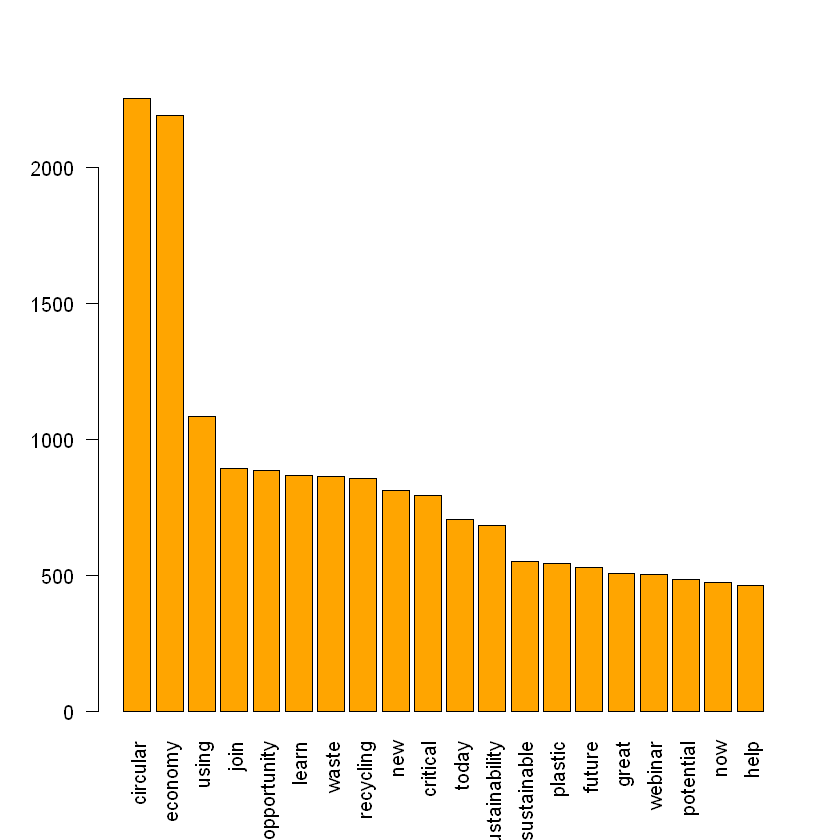

In [14]:
# Summing term frequencies to get the total frequency of each word
review_term_freq <- rowSums(review_m)
# Sorting term frequencies in descending order
review_term_freq <- sort(review_term_freq, decreasing = TRUE)
# List of the top 20 most frequent terms
# review_term_freq[1:20]
# Barplot of the top 20 most frequent terms
barplot(review_term_freq[1:20], col = "orange", las=2)

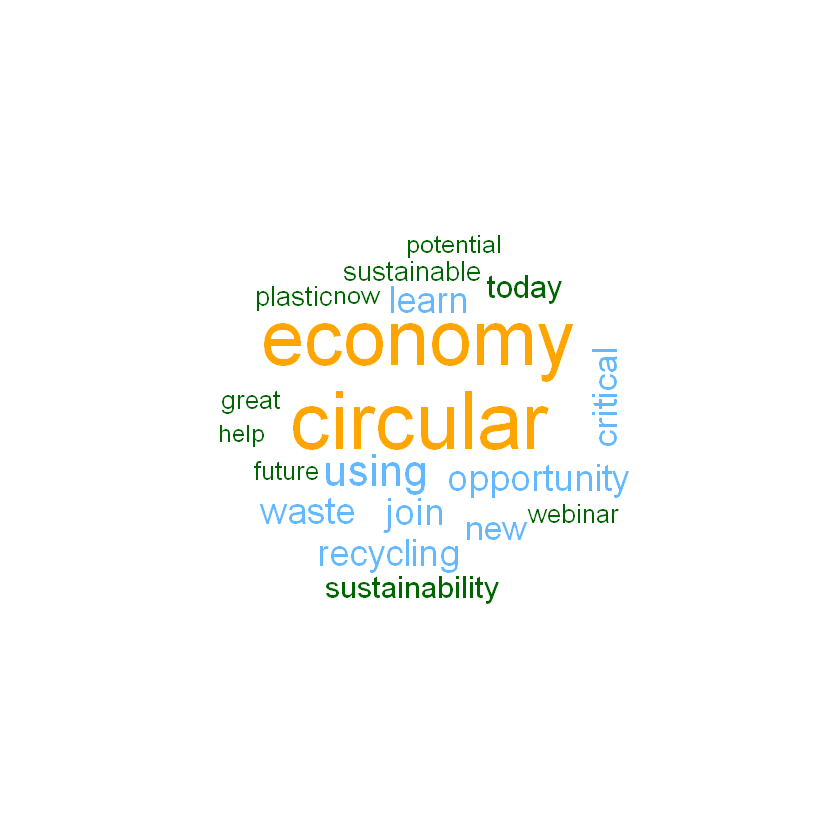

In [13]:
# Wordcloud with the top 20 most frequent terms
review_word_freq <- data.frame(term = names(review_term_freq), num = review_term_freq)
wordcloud(review_word_freq$term, review_word_freq$num, max.words = 20, random.order = FALSE, colors = c("darkgreen","steelblue1","orange"))
# review_word_freq$term
# review_word_freq$num

### 6 - Word associations

$plastic
pollution     ocean  continue      fish     gothe   convert      noon highvalue 
     0.44      0.21      0.20      0.17      0.13      0.11      0.11      0.11 
catalysis 
     0.11

$today
         consumed earthovershootday        regenerate               far 
             0.36              0.35              0.34              0.31 
            earth              year   worldcleanupday               iss 
             0.31              0.26              0.19              0.18 
        essential        homeowners            talked               btc 
             0.17              0.17              0.15              0.12 
           starts 
             0.10

$recycling
 potential       road opportunit     always       high   chemical    economy 
      0.52       0.42       0.17       0.13       0.13       0.12       0.11

$waste
       zero    obtained    landfill       label    startups         age 
       0.29        0.27        0.25        0.25        0.17        0.15 
       food   modelling     problem  management       subje   designers 
       0.14        0.14        0.13        0.13        0.13        0.12 
       five      export     options       sites       banne legislating 
       0.11        0.11        0.11        0.11        0.11        0.11 
      novel 
       0.10

$sustainable
 profitability          fries      delicious       footwear         trucks 
          0.18           0.16           0.16           0.16           0.15 
         caign       delivers           graf        pipelin          heidi 
          0.15           0.15           0.15           0.15           0.14 
      bradford           path  unprecedented economyneither         impact 
          0.14           0.13           0.13           0.13           0.12 
    supporting           fuel 
          0.12           0.11

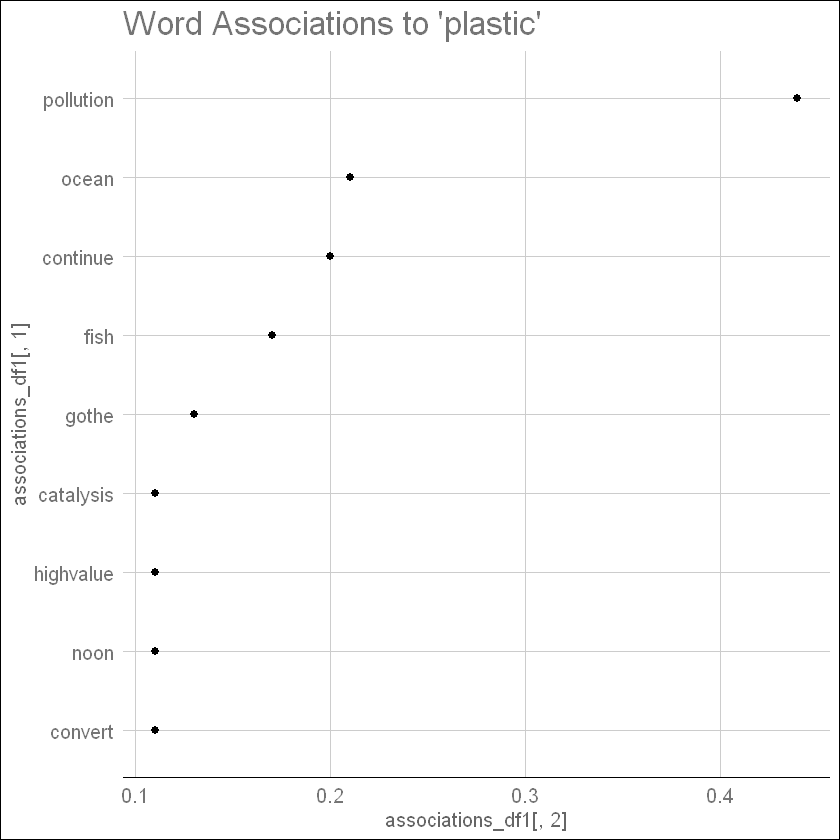

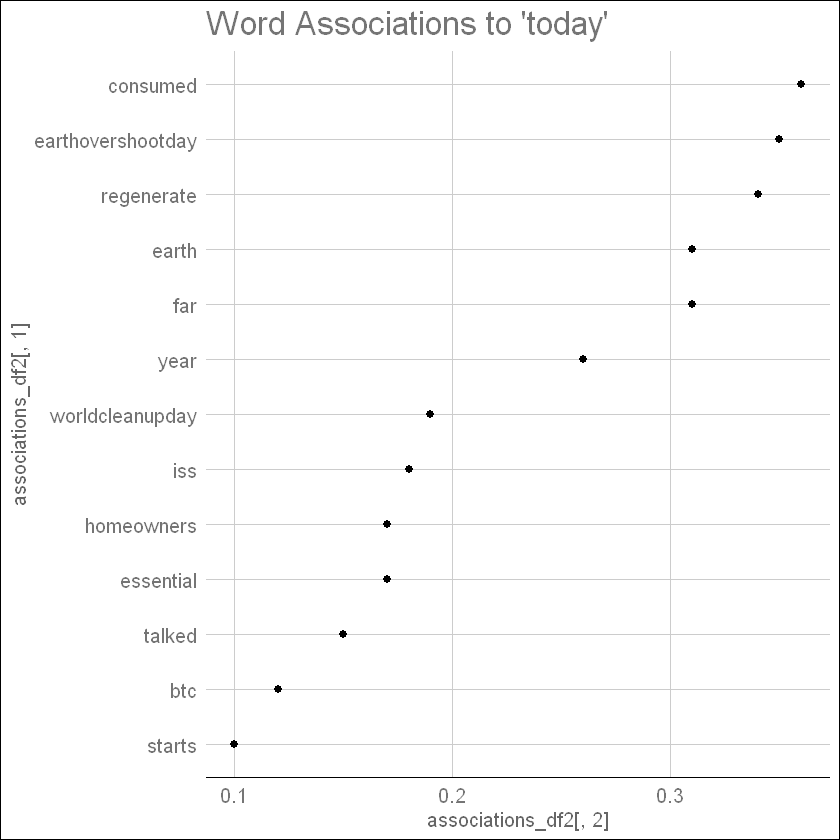

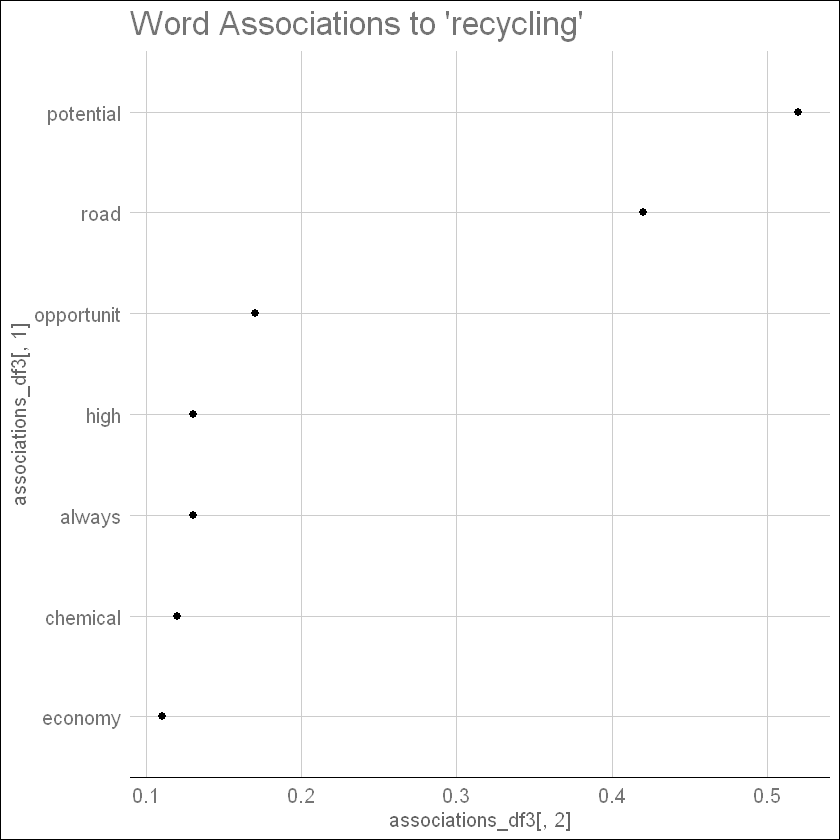

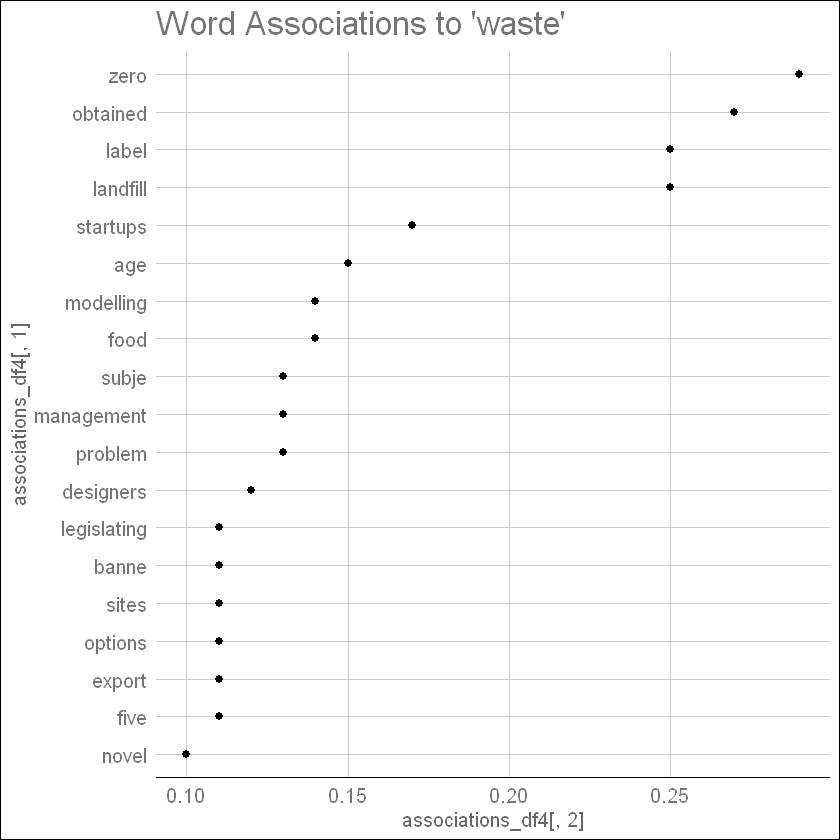

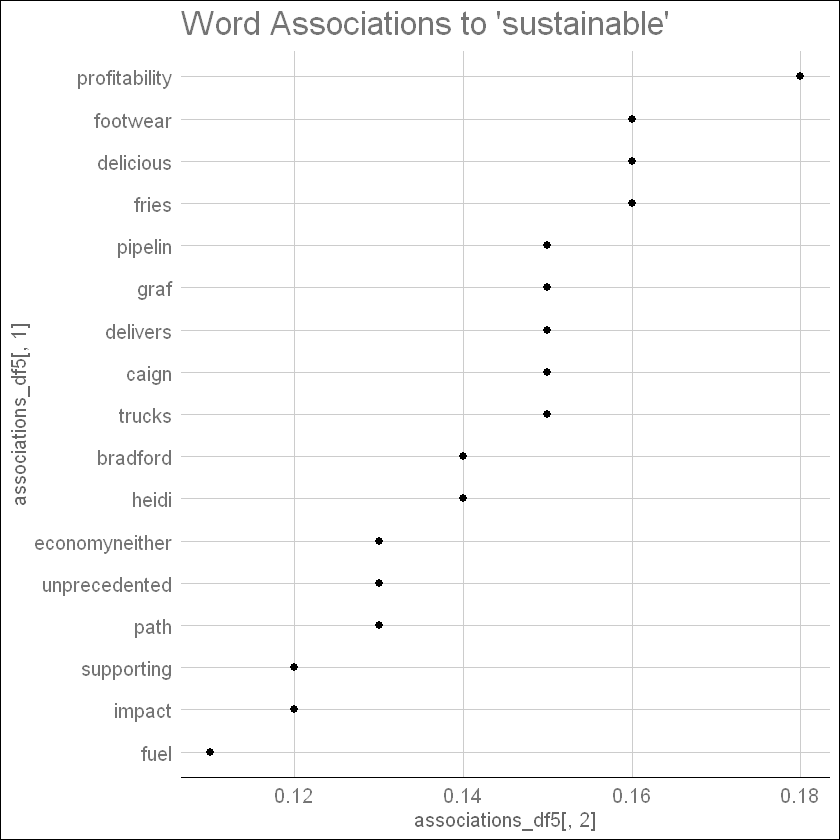

In [18]:
# Word associations
assocs_1 = findAssocs(review_dtm, terms = "plastic", 0.1)
assocs_1
assocs_2 = findAssocs(review_dtm, terms = "today", 0.1)
assocs_2
assocs_3 = findAssocs(review_dtm, terms = "recycling", 0.1)
assocs_3
assocs_4 = findAssocs(review_dtm, terms = "waste", 0.1)
assocs_4
assocs_5 = findAssocs(review_dtm, terms = "sustainable", 0.1)
assocs_5

associations_df1 = list_vect2df(assocs_1)[, 2:3]
ggplot(associations_df1, aes(y = associations_df1[, 1])) + geom_point(aes(x = associations_df1[, 2]), data = associations_df1, size = 2) + ggtitle("Word Associations to 'plastic'") + theme_gdocs()

associations_df2 = list_vect2df(assocs_2)[, 2:3]
ggplot(associations_df2, aes(y = associations_df2[, 1])) + geom_point(aes(x = associations_df2[, 2]), data = associations_df2, size = 2) + ggtitle("Word Associations to 'today'") + theme_gdocs()

associations_df3 = list_vect2df(assocs_3)[, 2:3]
ggplot(associations_df1, aes(y = associations_df3[, 1])) + geom_point(aes(x = associations_df3[, 2]), data = associations_df3, size = 2) + ggtitle("Word Associations to 'recycling'") + theme_gdocs()

associations_df4 = list_vect2df(assocs_4)[, 2:3]
ggplot(associations_df4, aes(y = associations_df4[, 1])) + geom_point(aes(x = associations_df4[, 2]), data = associations_df4, size = 2) + ggtitle("Word Associations to 'waste'") + theme_gdocs()

associations_df5 = list_vect2df(assocs_5)[, 2:3]
ggplot(associations_df5, aes(y = associations_df5[, 1])) + geom_point(aes(x = associations_df5[, 2]), data = associations_df5, size = 2) + ggtitle("Word Associations to 'sustainable'") + theme_gdocs()


### 7 - Bigrams and trigrams

In [19]:
# Creating bigrams
review_bigram = tokens(test_twitter$text) %>%
  tokens_remove("\\p{P}", valuetype = "regex", padding = TRUE) %>%
  tokens_remove(stopwords("english"), padding  = TRUE) %>%
  tokens_ngrams(n = 2) %>%
  dfm()
topfeatures(review_bigram)

# Creating trigrams
review_trigram = tokens(test_twitter$text) %>%
  tokens_remove("\\p{P}", valuetype = "regex", padding = TRUE) %>%
  tokens_remove(stopwords("english"), padding  = TRUE) %>%
  tokens_ngrams(n = 3) %>%
  dfm()
topfeatures(review_trigram)

circular_economy natural_resources  helped_customers   customers_avoid 
             7333               379               362               362 
      avoid_using         earth_can    can_regenerate           join_us 
              362               257               257               255 
    critical_need        zero_waste 
              231               164

helped_customers_avoid      customers_avoid_using 
                       362                        362 
      earth_can_regenerate          advanced_pig_farm 
                       257                        141 
   circular_carbon_economy       new_circular_economy 
                       136                        120 
      see_govt_legislating     circular_economy_forum 
                        88                         79 
ellen_macarthur_foundation     world_circular_economy 
                        72                         70

### 8 - General sentiment analysis

In [35]:
# General sentiment analysis using the syuzhet package
sentiment_Syuzhet = get_sentiment(test_twitter$text)
sum_sentiment = sum(sentiment_Syuzhet)
cat("sentiment sum:", sum_sentiment, "\n")

sum sentiment: 12617.3 


In [36]:
sentiment_nrc = get_nrc_sentiment(test_twitter$text)
sentiment_nrc
colSums(sentiment_nrc)

anger anticipation disgust fear joy sadness surprise trust negative
1     0     0            0       0    0   0       0        2     0       
2     0     0            0       0    0   0       0        1     0       
3     0     0            0       0    0   0       0        0     0       
4     0     2            0       0    1   0       1        1     0       
5     0     0            0       0    0   0       0        1     0       
6     0     1            0       0    0   0       0        1     0       
7     0     1            0       0    0   0       0        1     0       
8     0     0            0       0    0   0       0        1     0       
9     0     0            0       0    0   0       0        2     0       
10    0     0            0       0    0   0       0        1     0       
      positive
1     2       
2     1       
3     0       
4     3       
5     0       
6     0       
7     0       
8     0       
9     0       
10    0       
 [ raggiunto getOption("max.print") -- omesse 51 righe ]

anger anticipation      disgust         fear          joy      sadness 
        1524         6712         2843         2719         5620         1677 
    surprise        trust     negative     positive 
        2009        17875         5883        18805

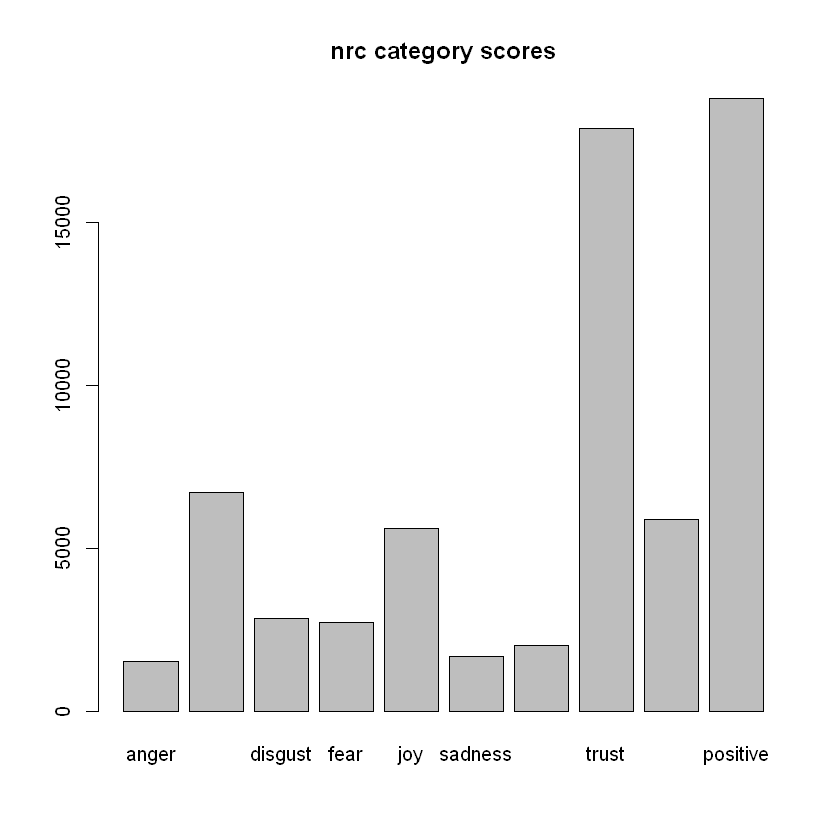

In [43]:
# Barplot showing sentiment scores for each category in sentiment_nrc
sentiment_nrc1 = c(anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive)

barplot(sentiment_nrc1, main = "nrc category scores", col = "grey", names.arg = c("anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust", "negative", "positive"))

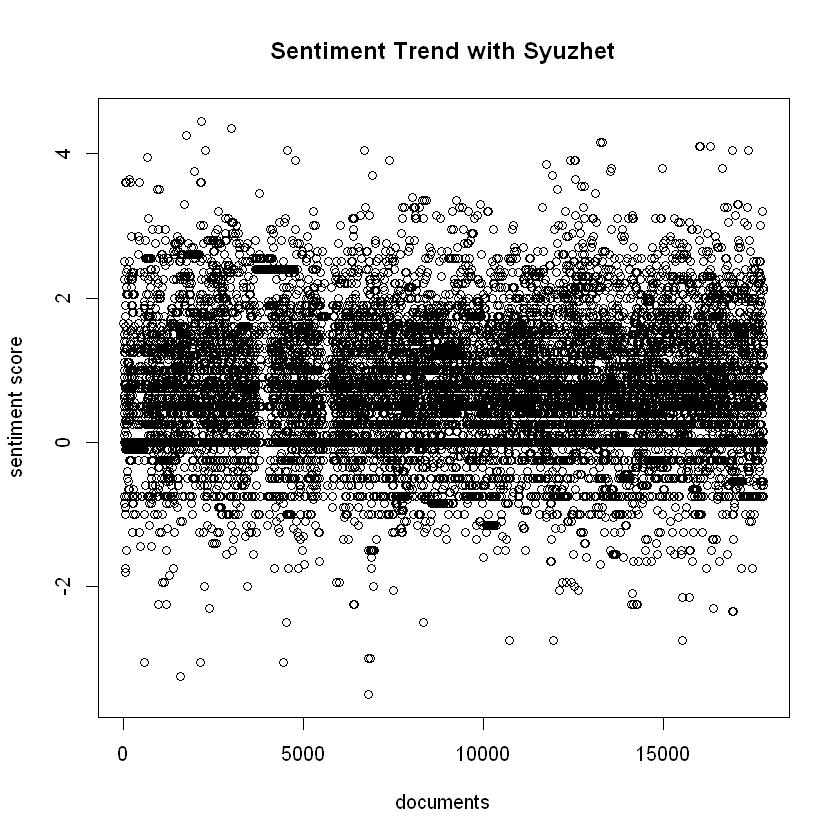

In [44]:
plot(sentiment_Syuzhet, main = "Sentiment Trend with Syuzhet", xlab = "documents", ylab = "sentiment score")

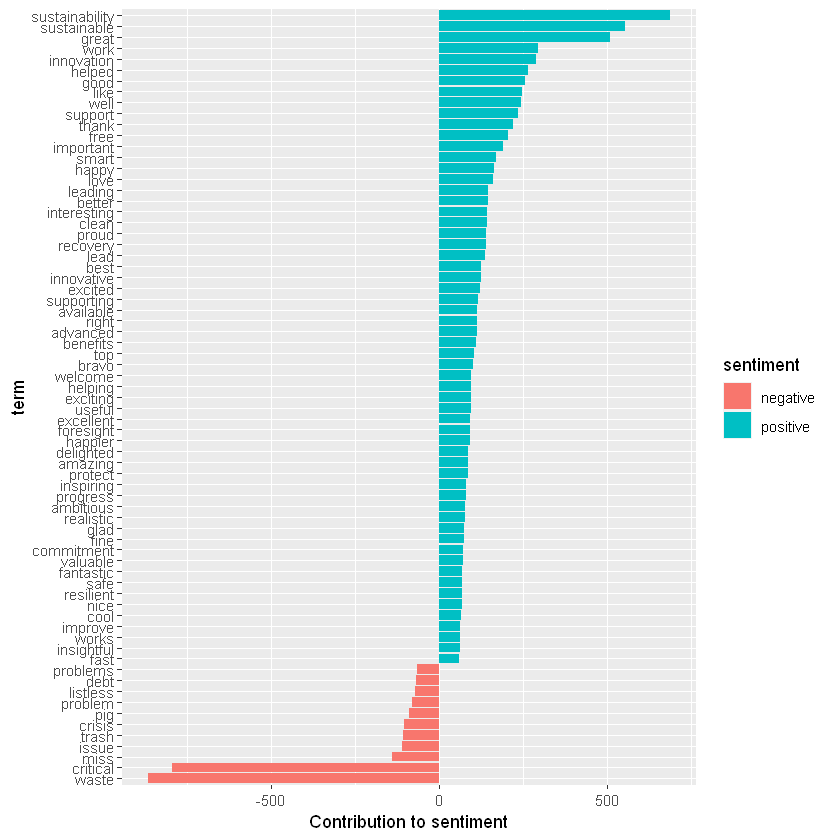

In [45]:
# Plot showing the contribution of words to overall sentiment
ap_td = tidy(review_dtm)
ap_sentiments <- ap_td %>%
  inner_join(get_sentiments("bing"), by = c(term = "word")) 
ap_sentiments %>%
  count(sentiment, term, wt = count) %>%
  ungroup() %>%
  filter(n >= 60) %>%
  mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
  mutate(term = reorder(term, n)) %>%
  ggplot(aes(term, n, fill = sentiment)) +
  geom_bar(stat = "identity") +
  ylab("Contribution to sentiment") +
  coord_flip()

### 9 - Topic identification

2024-01-05 19:26:13 Annotating text fragment 1/17799
2024-01-05 19:26:13 Annotating text fragment 11/17799
2024-01-05 19:26:13 Annotating text fragment 21/17799
2024-01-05 19:26:13 Annotating text fragment 31/17799
2024-01-05 19:26:14 Annotating text fragment 41/17799
2024-01-05 19:26:14 Annotating text fragment 51/17799
2024-01-05 19:26:14 Annotating text fragment 61/17799
2024-01-05 19:26:14 Annotating text fragment 71/17799
2024-01-05 19:26:14 Annotating text fragment 81/17799
2024-01-05 19:26:15 Annotating text fragment 91/17799
2024-01-05 19:26:15 Annotating text fragment 101/17799
2024-01-05 19:26:15 Annotating text fragment 111/17799
2024-01-05 19:26:15 Annotating text fragment 121/17799
2024-01-05 19:26:15 Annotating text fragment 131/17799
2024-01-05 19:26:16 Annotating text fragment 141/17799
2024-01-05 19:26:16 Annotating text fragment 151/17799
2024-01-05 19:26:16 Annotating text fragment 161/17799
2024-01-05 19:26:16 Annotating text fragment 171/17799
2024-01-05 19:26:17 A

[[1]]
     token probability
1 circular 0.052729638
2  economy 0.044226662
3      new 0.009128001
4    waste 0.009084212
5  Economy 0.008869249

[[2]]
     token probability
1      see  0.07214471
2     farm  0.04167231
3 advanced  0.03854694
4  happier  0.03620290
5      pig  0.03620290

[[3]]
        token probability
1       waste  0.02687770
2         new  0.02111172
3 sustainable  0.01806450
4        need  0.01693320
5    business  0.01600262

[[4]]
     token probability
1      use  0.09272745
2      ton  0.05423693
3 resource  0.05269148
4  natural  0.04464346
5    avoid  0.04254398

[[5]]
     token probability
1 circular  0.20294898
2  economy  0.16600955
3  Economy  0.02329122
4   carbon  0.01326088
5   recycl  0.01129035

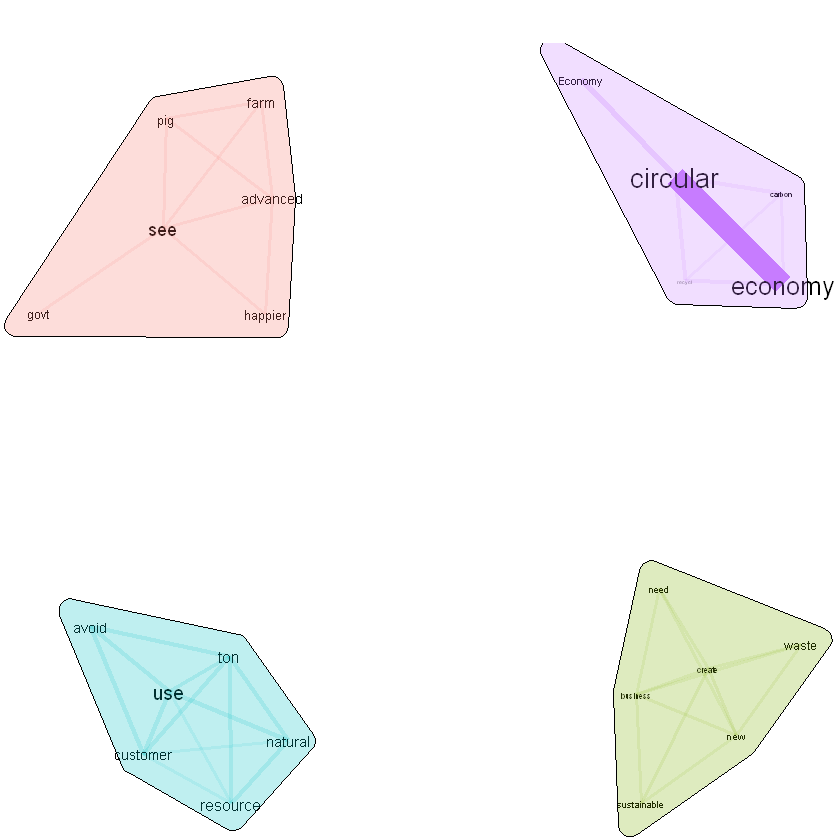

In [46]:
# Topic modeling
topic_ <- udpipe(test_twitter$text, "english", trace = 10)
biterms <- as.data.table(topic_)
biterms <- biterms[, cooccurrence(x = lemma,
                                  relevant = upos %in% c("NOUN", "ADJ", "VERB") & 
                                    nchar(lemma) > 2 & !lemma %in% stopwords("en"),
                                  skipgram = 3),
                   by = list(doc_id)]
traindata <- subset(topic_, upos %in% c("NOUN", "ADJ", "VERB") & !lemma %in% stopwords("en") & nchar(lemma) > 2)
traindata <- traindata[, c("doc_id", "lemma")]
model <- BTM(traindata, biterms = biterms, k = 5, iter = 2000, background = TRUE, trace = 100) # Gibbs sampling
terms(model)
plot(model, top_n = 6, title = "")

### 10 - Sentiment analysis relative to topics

In [50]:
# Sentiment by topic:

# Sentiment for the "circular economy" topic
token1_1 <- grep("economy", test_twitter$text)
token1_2 <- grep("circular", test_twitter$text)
token1_3 <- grep("business", test_twitter$text)
token1_4 <- grep("new", test_twitter$text) 
token1_5 <- grep("create", test_twitter$text)
token1 <- c(token1_1,token1_2,token1_3,token1_4,token1_5)
unique(token1)
senttoken1 <- get_sentiment(test_twitter$text[unique(token1)])
senttoken1
sum(senttoken1)

# Sentiment for the "sustainability" topic
token2_1 <- grep("make", test_twitter$text) 
token2_2 <- grep("waste", test_twitter$text)
token2_3 <- grep("plastic", test_twitter$text) 
token2_4 <- grep("food", test_twitter$text) 
token2_5 <- grep("use", test_twitter$text) 
token2 <- c(token2_1,token2_2,token2_3,token2_4,token2_5)
unique(token2)
senttoken2 <- get_sentiment(test_twitter$text[unique(token2)])
sum(senttoken2)

# Sentiment for the "recycling" topic
token3_1 <- grep("plastic", test_twitter$text) 
token3_2 <- grep("recycle", test_twitter$text)
token3_3 <- grep("waste", test_twitter$text) 
token3_4 <- grep("ton", test_twitter$text) 
token3_5 <- grep("sustainable", test_twitter$text) 
token3 <- c(token3_1,token3_2,token3_3,token3_4,token3_5)
unique(token3)
senttoken3 <- get_sentiment(test_twitter$text[unique(token3)])
sum(senttoken3)

# Sentiment for the "environmental resources" topic
token4_1 <- grep("use", test_twitter$text) 
token4_2 <- grep("ton", test_twitter$text)
token4_3 <- grep("resource", test_twitter$text) 
token4_4 <- grep("natural", test_twitter$text) 
token4_5 <- grep("avoid", test_twitter$text) 
token4 <- c(token4_1,token4_2,token4_3,token4_4,token4_5)
unique(token4)
senttoken4 <- get_sentiment(test_twitter$text[unique(token4)])
sum(senttoken4)

# Sentiment for the "webinar" topic
token5_1 <- grep("today", test_twitter$text)
token5_2 <- grep("new", test_twitter$text)
token5_3 <- grep("join", test_twitter$text)
token5_4 <- grep("event", test_twitter$text)
token5_5 <- grep("webinar", test_twitter$text)
token5 <- c(token5_1,token5_2,token5_3,token5_4,token5_5)
unique(token5)
senttoken5 <- get_sentiment(test_twitter$text[unique(token5)])
sum(senttoken5)


[1]   5   6   7   8   9  10  11  12  15  20  21  22  25  26  27  29  32  33
 [19]  34  35  38  39  40  41  42  44  45  46  48  51  62  64  65  66  72  73
 [37]  79  80  82  83  96  97  99 100 101 102 106 107 108 109 110 111 113 116
 [55] 117 118 119 120 121 122 124 125 128 129 130 134 136 139 142 144 147 150
 [73] 152 153 154 156 157 159 161 163 165 166 167 168 170 171 172 175 181 183
 [91] 184 185 187 189 195 196 198 199 201 202
 [ reached getOption("max.print") -- omitted 8585 entries ]

[1]  1.00  1.50  1.50  0.00  0.80  0.50 -0.75  1.25  0.10  0.40  0.80  0.00
 [13]  0.00  1.25  2.50  1.75 -0.10  0.00  0.15  0.30  0.75  0.00 -0.90  1.60
 [25]  1.75  0.75  0.00  1.75  0.55 -0.10  0.00  0.75 -0.10  0.75  0.75 -0.75
 [37]  2.35  2.35 -0.10  0.50  0.00  0.75 -0.10  1.50 -0.10 -0.10 -0.10  0.10
 [49]  0.00  0.60  0.60  1.00  0.00 -0.10  0.00  0.00 -0.10 -0.10 -0.10  0.75
 [61]  0.50  0.30 -0.10  2.25  2.25 -0.65  0.30  0.50  2.50  0.50 -0.10  0.00
 [73]  2.30 -0.25  0.65  0.65  0.40  1.00  0.00  1.25  3.65 -0.65  0.65  0.75
 [85]  0.65  1.25  0.75  0.30  0.00  0.75  0.75  0.75  1.35 -0.10 -0.25 -0.10
 [97] -0.10  0.80  1.55  2.85
 [ reached getOption("max.print") -- omitted 8585 entries ]

[1] 6399.6

[1]    2   58   96  173  175  188  205  208  251  282  283  304  328  354  684
 [16]  707  708  709  740  762  763  770  780  793  861  897  916  921  922  924
 [31]  932  941  951  969  971  978  985  992  994  997 1000 1003 1012 1017 1152
 [46] 1275 1314 1387 1388 1389 1393 1394 1419 1441 1451 1523 1530 1533 1534 1539
 [61] 1572 1604 1655 1714 1738 1750 1816 1858 1883 1896 1952 1971 2108 2216 2263
 [76] 2367 2398 2419 2427 2431 2473 2506 2553 2601 2815 2879 2880 2901 3022 3032
 [91] 3040 3060 3079 3099 3116 3121 3206 3243 3270 3274
 [ reached getOption("max.print") -- omitted 3603 entries ]

[1] 1532.5

[1]   13   16   39   49   55   71   74   92   94   95  108  135  149  155  160
 [16]  182  186  229  236  242  248  255  256  268  274  302  347  381  387  394
 [31]  399  403  422  446  466  508  565  572  576  580  592  593  595  597  598
 [46]  599  604  606  609  610  611  612  614  615  617  618  620  621  623  624
 [61]  625  626  628  629  630  631  632  633  672  691  761  764  781  791  891
 [76]  957 1018 1156 1183 1280 1286 1314 1327 1347 1350 1394 1414 1419 1427 1435
 [91] 1436 1441 1447 1449 1457 1480 1524 1544 1658 1679
 [ reached getOption("max.print") -- omitted 3548 entries ]

[1] 2653.05

[1]    9   39   59   63   68   73   87   92   94  207  209  227  231  262  264
 [16]  270  276  328  354  398  466  494  613  656  664  669  671  672  681  690
 [31]  698  702  705  706  713  714  720  742  769  804  809  845  849  875  876
 [46]  883  890  898  904  923  925  937  941  948  974  988 1005 1019 1029 1044
 [61] 1078 1089 1094 1134 1180 1186 1198 1237 1261 1266 1290 1293 1304 1314 1332
 [76] 1344 1377 1383 1385 1394 1410 1419 1441 1449 1458 1563 1571 1675 1678 1704
 [91] 1785 1797 1800 1810 1812 1814 1829 1834 1842 1855
 [ reached getOption("max.print") -- omitted 2243 entries ]

[1] 1910.25

[1]   45   62  113  274  591  668  709  762  763  783  799  805  806  814  820
 [16]  821  824  825  827  834  838  839  855  857  858  860  862  864  866  867
 [31]  874 1001 1002 1004 1041 1268 1276 1293 1332 1341 1365 1383 1385 1468 1473
 [46] 1482 1500 1637 1649 1653 1677 1734 1741 2002 2224 2305 2348 2354 2493 2557
 [61] 2632 2645 2748 2761 2774 2809 2821 2867 2869 2876 3001 3012 3114 3116 3118
 [76] 3125 3163 3220 3222 3226 3227 3231 3252 3275 3304 3313 3323 3354 3389 3503
 [91] 3563 3635 3788 4188 4226 4245 4278 4293 4319 4337
 [ reached getOption("max.print") -- omitted 2725 entries ]

[1] 2927.4

In [51]:
# Classifying tweets based on identified topics
options(max.print=100)
test_twitter$text[unique(token1)]
test_twitter$text[unique(token2)]
test_twitter$text[unique(token3)]
test_twitter$text[unique(token4)]
test_twitter$text[unique(token5)]

[1] "After awareness, one of the keys to EVs sustainability is the development of the circular economy!\n\n#EV #EVs https://t.co/RCGPiQg0cl"       
  [2] ": Final 3 days: Submit YOUR abstract #URP2020\n\n Great sessions on\nregional governance\ncircular economy\nsustainability\nresilien"         
  [3] ": Final 3 days: Submit YOUR abstract #URP2020\n\n Great sessions on\nregional governance\ncircular economy\nsustainability\nresilien"         
  [4] " What's with Bitcoins circular economy? It's summertime"                                                                                      
  [5] ": Listen to Dr. Gillian Foster discuss circular economy strategies for adaptive reuse of cultural heritage buildings as a"                    
  [6] "Scotland's circular economy primed for a boost  https://t.co/Wyu2JEb9Qt"                                                                      
  [7] "_moja: In circular economy, unlike linear economy, waste is considered part of the system. It is a resource or material in itself t"          
  [8] "What is the role of industry in driving sustainability and circular economy? Join us this Wednesday, as we host the https://t.co/1MqI8R6LKm"  
  [9] ": How will the post #covid19 world look with a #circulareconomy? As our old ways of production and consumption are shaken d"                  
 [10] ": Led by , Finland, Canada and the Netherlands will be co-hosting events to show how the circular economy ca"                                 
 [11] ": The copper industry contributes to a more circular economy. Follow us to learn more!"                                                       
 [12] "From fries to miles  a circular economy by McDonalds, Neste and HAVI https://t.co/VZIbJbI6hQ via "                                            
 [13] "Sweden transitioning to a circular economy - https://t.co/uJM56PIAG0 https://t.co/KjFEatkzZ6"                                                 
 [14] ": Calling all Early Career Researchers working in #sustainability #circulareconomy #transport - we are running a Circ"                        
 [15] "It's worth understanding the #circulareconomy, an economically viable solution to:\n- 100+ Trillion kg of materials https://t.co/BNYI9NXtz1"  
 [16] ": Foresight and innovation are key. No society can shift overnight to a thriving economy in a world characterized by clima"                   
 [17] ": Had ed about the potential of recycling  the circular economy. Its not just an opportunity but a critical need "                            
 [18] "  All we need is a circular economy..."                                                                                                       
 [19] "Squaring the circle: how food and drink manufacturers can unlock the value of the circular economy after Covid-19 https://t.co/d6hI7TVFYs"    
 [20] ": With a #population predicted to grow to 9.6 billion by 2050 and increasing resource scarcity, shifting to a #circulareconomy i"             
 [21] "China Easterns Fly at Will Ticket Package for Unlimited Weekend Travel Boosts Circular #economy https://t.co/zfcfYgWJb6"                      
 [22] "LANXESS increasingly making use of the circular economy for plastics\n\nhttps://t.co/qVd27PTrFF\n\n#LANXESS https://t.co/RHYjZgQbL9"          
 [23] "   Any delays with San Marino circular economy Launch ?"                                                                                      
 [24] "justifying spending money on kpop albums bc i am helping to stimulate the circular flow of the economy"                                       
 [25] "Foresight and innovation are key. No society can shift overnight to a thriving economy in a world characterized by https://t.co/dYsONyOXUk"   
 [26] ": I am glad to see  raising awareness about the critical need to move toward a #circulareconomy. It is a realistic goa"                       
 [27] ": Why must we move away from today's linear economy? \n\n\"A circular economy is based on the l

[1] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
  [2] "The Circular Economy: 'I'm easy to speak with and will try to make sure the ole thing will be fun.' Read the arti https://t.co/r5QSQnODaH"     
  [3] "The world needs a circular economy. Let's make it happen https://t.co/BJY8HZCpkH"                                                              
  [4] ": #WCEF goes   -/! Please register and join some of the world's top business leaders, policymakers and thi"                                    
  [5] "Is our take-make-waste economy destined for the dump? New CQ Researcher at https://t.co/rf3raq32rl digs into  the c https://t.co/TxJRkQxvCY"   
  [6] ": #WCEF goes   -/! Please register and join some of the world's top business leaders, policymakers and thi"                                    
  [7] ": Over the years my team  and I have created a range of free, open-access toolkits to support changemakers"                                    
  [8] ": . reports on policymakers, CEOs, + other influential individuals supporting circular economy as a solution to #BuildBac"                     
  [9] ": . reports on policymakers, CEOs, + other influential individuals supporting circular economy as a solution to #BuildBac"                     
 [10] ": #WCEF goes   -/! Please register and join some of the world's top business leaders, policymakers and thi"                                    
 [11] ": #WCEF goes   -/! Please register and join some of the world's top business leaders, policymakers and thi"                                    
 [12] "#WCEF goes   -/! Please register and join some of the world's top business leaders, policymakers and https://t.co/M9Q0uql5CY"                  
 [13] ": Our goal must be a consistent shift from a linear take-make-use-dispose approach to a circular approach. LANXESS Board membe"                
 [14] ": Our goal must be a consistent shift from a linear take-make-use-dispose approach to a circular approach. LANXESS Board membe"                
 [15] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [16] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [17] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [18] ": \"The circular economy could unlock $4.5 trillion of growth by 2030. Breaking with todays \"take, make, waste\" business mo"                 
 [19] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [20] ": \"The circular economy could unlock $4.5 trillion of growth by 2030. Breaking with todays \"take, make, waste\" business mo"                 
 [21] ": \"The circular economy could unlock $4.5 trillion of growth by 2030. Breaking with todays \"take, make, waste\" business mo"                 
 [22] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [23] "Policymakers, CEOs, and other influential individuals are highlighting the circular economy as a solution to build https://t.co/RIWXC8fHkq"    
 [24] ": With consumers asking more and more for #sustainable products in order to make positive changes, and with business abl"                      
 [25] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [26] ": Construction is responsible for 45-50% of U.K. carbon emissions and could make all the difference on net zero if circular econ"              
 [27] ": Construction is responsible for 45-50% of U.K. carbon emissions and

[1] ": How are the chemical companies innovating to transform the plastics industry? Christian Haessler, Circular Economy Program Le"                
  [2] "Excellent insight . Leaders across our industry must \"build a plastics #CircularEconomy that will e https://t.co/tHX7NeedjT"                   
  [3] "LANXESS increasingly making use of the circular economy for plastics\n\nhttps://t.co/qVd27PTrFF\n\n#LANXESS https://t.co/RHYjZgQbL9"            
  [4] ": Plant-based products provide the same sanitary benefits as legacy plastics, ile also helping to build a more circula"                         
  [5] ": Plant-based products provide the same sanitary benefits as legacy plastics, ile also helping to build a more circula"                         
  [6] ": Plant-based products provide the same sanitary benefits as legacy plastics, ile also helping to build a more circula"                         
  [7] ": On the road to recycling.\n\n Learn more about plastic pollution: https://t.co/6f9setEEKe https://t.co/kFYdrmvqpG"                            
  [8] "_UG4PH: \"#India is on a mission to stop single-use plastics polluting the #oceans.\" Specifically in Kerela, the fishermen have s"             
  [9] "_UG4PH: \"#India is on a mission to stop single-use plastics polluting the #oceans.\" Specifically in Kerela, the fishermen have s"             
 [10] ": On the road to recycling.\n\n Learn more about plastic pollution: https://t.co/6f9setEEKe https://t.co/kFYdrmvqpG"                            
 [11] "Circular economy solution marine plastic waste problem https://t.co/2WDecsDSCX via  #sustainability https://t.co/Lfy6d4zkZd"                    
 [12] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [13] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [14] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [15] "With #COVID19 exacerbating plastic pollution, it's essential that we accelerate efforts to eliminate https://t.co/mBwl9SdiYq"                   
 [16] ": Plant-based products provide the same sanitary benefits as legacy plastics, ile also helping to build a more circula"                         
 [17] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [18] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [19] ": This project of road using plastic waste is revolutionary and will clean India from Kashmir to kanyakumari \n\nUsing of waste"                
 [20] "This project of road using plastic waste is revolutionary and will clean India from Kashmir to kanyakumari \n\nUsing https://t.co/nGYCJsnMki"   
 [21] ": Wouldn't it be beneficial to implement process to collect  segregate waste  #RECYCLE plastic instead of banning?\n\nIt'"                      
 [22] "Wouldn't it be beneficial to implement process to collect  segregate waste  #RECYCLE plastic instead of banning? https://t.co/J0Wj4C2lT4"       
 [23] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [24] ": On the road to #recycling https://t.co/YWgn9u7IpH By  \n#plasticpollution #plasticfree #SDGs\n  "                                             
 [25] ": Our Plastic and Circular Economy Caigner  will be taking over our Twitter account today to talk all things plastic "                          
 [26] ": On the road to recycling.\n\n Learn more about plastic pollution: https://t.co/6f9setEEKe https://t.co/kFYdrmvqpG"                            
 [27] "Cortec's VCI plastic recycling service show

[1] ": Listen to Dr. Gillian Foster discuss circular economy strategies for adaptive reuse of cultural heritage buildings as a"                     
  [2] "LANXESS increasingly making use of the circular economy for plastics\n\nhttps://t.co/qVd27PTrFF\n\n#LANXESS https://t.co/RHYjZgQbL9"           
  [3] "_Infinity1 Hi Andrew! If you wish to read some science-infused essays that emphasize our interconnected nature, https://t.co/kSdHhbuPeX"       
  [4] "_Sameer Hey Sameer! If you wish to read some science-infused essays that emphasize our interconnected nature https://t.co/3XraZgL3mA"          
  [5] "Receiving more packaging than you reuse? Try offering clean bubble wrap to charity shops and padded envelopes on Fr https://t.co/XJHt2x5oOl"   
  [6] ": The common goal of Spains circular economy is to reuse waste, ich is y a non-profit company has set up a series of"                          
  [7] "3-Sector Circular Flow Diagram\nYou can observe the flows from the households and business to the government in the https://t.co/oT3ptOMDqB"   
  [8] "_UG4PH: \"#India is on a mission to stop single-use plastics polluting the #oceans.\" Specifically in Kerela, the fishermen have s"            
  [9] "_UG4PH: \"#India is on a mission to stop single-use plastics polluting the #oceans.\" Specifically in Kerela, the fishermen have s"            
 [10] "  Yes, one is the creation of a circular attention-economy so that users can obtain toke https://t.co/mzj7ApMFS0"                              
 [11] "_Research: 's new  _Innovation challenge Innovating for Soft Plastic in a Circular Economy focuses on r"                                       
 [12] "'s new  _Innovation challenge Innovating for Soft Plastic in a Circular Economy focuses https://t.co/TlES8Swbmh"                               
 [13] "Reducing garbage and adoption of Circular Economy.\n\nRefuse, Reduce, Reuse and Recycle is a bridge to connect with M https://t.co/vY08K4VoyR" 
 [14] "First we need  to release the $750 million waste levy that is not be used for waste or recycling - then we https://t.co/KV2nj1qGKy"            
 [15] "Cutting greenhouse gas emissions through circular economy actions in the buildings sector... https://t.co/uOxBDXAdPy"                          
 [16] "_Scot: Have you seen our online display at the National Museums of Scotland yet? Discover more about the Circular Economy throug"              
 [17] ": Transforming cities into thriving #circular societies: Five lessons from covid-19: How can cities use circular princip"                      
 [18] ": Our goal must be a consistent shift from a linear take-make-use-dispose approach to a circular approach. LANXESS Board membe"                
 [19] ": Our goal must be a consistent shift from a linear take-make-use-dispose approach to a circular approach. LANXESS Board membe"                
 [20] ": Join  for their virtual national conference, #ReUSE2020! Youll hear from expert speakers on how to use reuse, rent"                          
 [21] "LANXESS increasingly making use of the circular economy for plastics \nhttps://t.co/wIFHNikB7T \n\n   "                                        
 [22] ": I read 530+ pages so you wouldn't have to! Lots in the new House climate action plan for waste and recycling stakeholders, i"                
 [23] "Makes me proud! Circular economy: Lfbergs helps consumers to use the ole cup https://t.co/1aUt2R3ZQr via  International"                       
 [24] "_NA: Neste, McDonalds Netherlands and HAVI create a circular economy by refining used cooking oil into renewable diesel to fuel l"             
 [25] " _mp  Thats an good initiative to reuse... too many bags of  ,  n https://t.co/70V52kNEYk"                                                     
 [26] ": #ReusablePPE? \nSend me ideas, contacts, companies, circular economy, numer of times they can be used...  We need to look a"                 
 [27] "#TBT to the lead up of our last warehouse event en  dropped by for a 

[1] ": Why must we move away from today's linear economy? \n\n\"A circular economy is based on the long-term. Transitioning to a circula"           
  [2] ": Why must we move away from today's linear economy? \n\n\"A circular economy is based on the long-term. Transitioning to a circula"           
  [3] ": Why must we move away from today's linear economy? \n\n\"A circular economy is based on the long-term. Transitioning to a circula"           
  [4] ": Our Plastic and Circular Economy Caigner  will be taking over our Twitter account today to talk all things plastic "                         
  [5] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
  [6] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
  [7] ": \"The circular economy could unlock $4.5 trillion of growth by 2030. Breaking with todays \"take, make, waste\" business mo"                 
  [8] ": \"The circular economy could unlock $4.5 trillion of growth by 2030. Breaking with todays \"take, make, waste\" business mo"                 
  [9] ": \"The circular economy could unlock $4.5 trillion of growth by 2030. Breaking with todays \"take, make, waste\" business mo"                 
 [10] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [11] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [12] ": In his latest guest post for _today  talks about the need for organisations to r up their collecti"                                          
 [13] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [14] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [15] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [16] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [17] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [18] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [19] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [20] "Join our FREE webinar today, 08 July 2020, on \"Reducing Waste - Circular economy in food and beverage), 14:00 to 14 https://t.co/4oJIwlAuET"  
 [21] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [22] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [23] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [24] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [25] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [26] ": Skin in the game. $250,000 machine + attachment with #Bitcoin on the side of it.\n\nTalked to 3 homeowners today about BTC"                  
 [27] ": Circular Economy Adding Value to Construction \nThe Circular Econom

### 12 - Extraction of the most frequent hashtags

In [58]:
# Extracting hashtags
funzione_hashtag <- str_extract_all(test_twitter$text, "(?<=^|\\s)#\\S+")
hash <- (funzione_hashtag)
hashtag <- unique(hash)
funzione_hashtag
h <- compact(hashtag) # Removing empty tweets (those without hashtags)

# Most relevant hashtags
h_singoli <- c(unlist(h)) # Putting each hashtag on a separate line
corpus_hashtag = Corpus(VectorSource(h_singoli)) # Creating a corpus
corpus_hashtag = tm_map(corpus_hashtag, tolower) # Converting text to lowercase (including #)
corpus_hashtag = tm_map(corpus_hashtag, removePunctuation) # Removing punctuation
corpus_hashtag = tm_map(corpus_hashtag, removeNumbers) # Removing numbers
corpus_hashtag = tm_map(corpus_hashtag, removeWords, stopwords("english")) # Removing stopwords
my_stopwords <- c("may", "will", "also", "get", "made", "can", 
                  "am", "just", "i", "i'm", "ucu", "ucue",
                  "of", "the", "this", "in", "know",
                  "want", "need", "che", "amp", "check",  
                  "read", "circ", "one", "eriksolheim", "just",
                  "&amp;", "&", ";", "&amp", "wh", "1st", 
                  "circulareconomy", "circular", "economy")
corpus_hashtag = tm_map(corpus_hashtag, removeWords, my_stopwords) # Removing highly frequent words
review_hashtag <- TermDocumentMatrix(corpus_hashtag, control=list(wordlength=c(1,Inf), weighting = weightTfIdf))
# Converting TDM to a matrix
matrice_hashtag <- as.matrix(review_hashtag)
# Summing term frequencies to get the total frequency of each word
lista_hashtag <- rowSums(matrice_hashtag)
# Sorting term frequencies in descending order
lista_hashtag <- sort(lista_hashtag, decreasing = TRUE)

[[1]]
character(0)

[[2]]
character(0)

[[3]]
character(0)

[[4]]
[1] "#manufacturing?" "#ideas"         

[[5]]
[1] "#EV"  "#EVs"

[[6]]
[1] "#URP2020"

[[7]]
[1] "#URP2020"

[[8]]
character(0)

[[9]]
character(0)

[[10]]
character(0)

[[11]]
character(0)

[[12]]
character(0)

[[13]]
character(0)

[[14]]
[1] "#EESCPlenary"                "#CircularEconomyActionPlan?"

[[15]]
[1] "#covid19"          "#circulareconomy?"

[[16]]
[1] "#CircularEconomy"

[[17]]
[1] "#manufacturing?"

[[18]]
character(0)

[[19]]
character(0)

[[20]]
character(0)

[[21]]
character(0)

[[22]]
character(0)

[[23]]
[1] "#UNIDO"

[[24]]
[1] "#Lead"      "#batteries"

[[25]]
character(0)

[[26]]
[1] "#sustainability"  "#circulareconomy" "#transport"      

[[27]]
[1] "#circulareconomy,"

[[28]]
character(0)

[[29]]
character(0)

[[30]]
[1] "#Model2Bio"

[[31]]
character(0)

[[32]]
character(0)

[[33]]
character(0)

[[34]]
character(0)

[[35]]
[1] "#population"      "#circulareconomy"

[[36]]
character(0)

[[37]]
character(0)

[[38]]
[1] "#economy"

[[39]]
[1] "#LANXESS"

[[40]]
character(0)

[[41]]
character(0)

[[42]]
character(0)

[[43]]
character(0)

[[44]]
[1] "#circulareconomy."

[[45]]
character(0)

[[46]]
character(0)

[[47]]
character(0)

[[48]]
character(0)

[[49]]
character(0)

[[50]]
[1] "#AtmaNirbharBharat" "#Authentic"         "#Responsible"      
[4] "#Empowering"       

[[51]]
character(0)

[[52]]
character(0)

[[53]]
[1] "#AtmaNirbharBharat" "#Authentic"         "#Responsible"      

[[54]]
[1] "#1" "#2"

[[55]]
character(0)

[[56]]
character(0)

[[57]]
character(0)

[[58]]
character(0)

[[59]]
character(0)

[[60]]
character(0)

[[61]]
character(0)

[[62]]
character(0)

[[63]]
character(0)

[[64]]
[1] "#circulareconomy."

[[65]]
character(0)

[[66]]
[1] "#circulareconomy."

[[67]]
character(0)

[[68]]
character(0)

[[69]]
character(0)

[[70]]
character(0)

[[71]]
character(0)

[[72]]
character(0)

[[73]]
character(0)

[[74]]
character(0)

[[75]]
[1] "#design"        "#construction"  "#architecture."

[[76]]
character(0)

[[77]]
character(0)

[[78]]
[1] "#EU"     "#GCC"    "#energy"

[[79]]
character(0)

[[80]]
character(0)

[[81]]
character(0)

[[82]]
character(0)

[[83]]
character(0)

[[84]]
character(0)

[[85]]
character(0)

[[86]]
character(0)

[[87]]
character(0)

[[88]]
character(0)

[[89]]
character(0)

[[90]]
character(0)

[[91]]
character(0)

[[92]]
[1] "#oceans.\""

[[93]]
character(0)

[[94]]
[1] "#oceans.\""

[[95]]
character(0)

[[96]]
character(0)

[[97]]
[1] "#circulareconomy."

[[98]]
[1] "#Recycling" "#P"        

[[99]]
character(0)

[[100]]
character(0)

 [ reached getOption("max.print") -- omitted 17699 entries ]

Warning message in tm_map.SimpleCorpus(corpus_hashtag, tolower):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removeWords, my_stopwords):
"transformation drops documents"
Warning message in TermDocumentMatrix.SimpleCorpus(corpus_hashtag, control = list(wordlength = c(1, :
"custom functions are ignored"
Warning message in weighting(x):
"empty document(s): 3 9 10 16 18 21 22 24 32 33 37 42 45 47 56 61 68 82 95 102 104 105 107 108 112 117 120 125 129 131 142 144 156 159 164 170 174 176 183 187 192 197 204 214 216 220 224 225 226 233 234 244 251 271 273 274 278 280 287 295 300 310 314 322 327 329 345 354 373 380 383 3

In [57]:
# List of the top 20 most frequent hashtags
lista_hashtag[1:20]

sustainability          recycling        sustainable              waste 
          382.9800           317.0103           239.9173           234.4844 
             covid         wcefonline         innovation        environment 
          223.4900           183.5052           183.5052           177.5784 
       circularity            webinar           plastics      climatechange 
          153.2427           153.2427           153.2427           153.2427 
           plastic        eugreendeal wastereductionweek              reuse 
          140.6545           121.1576           121.1576           114.4739 
         zerowaste          packaging        supplychain            climate 
          114.4739           114.4739           114.4739           107.6871

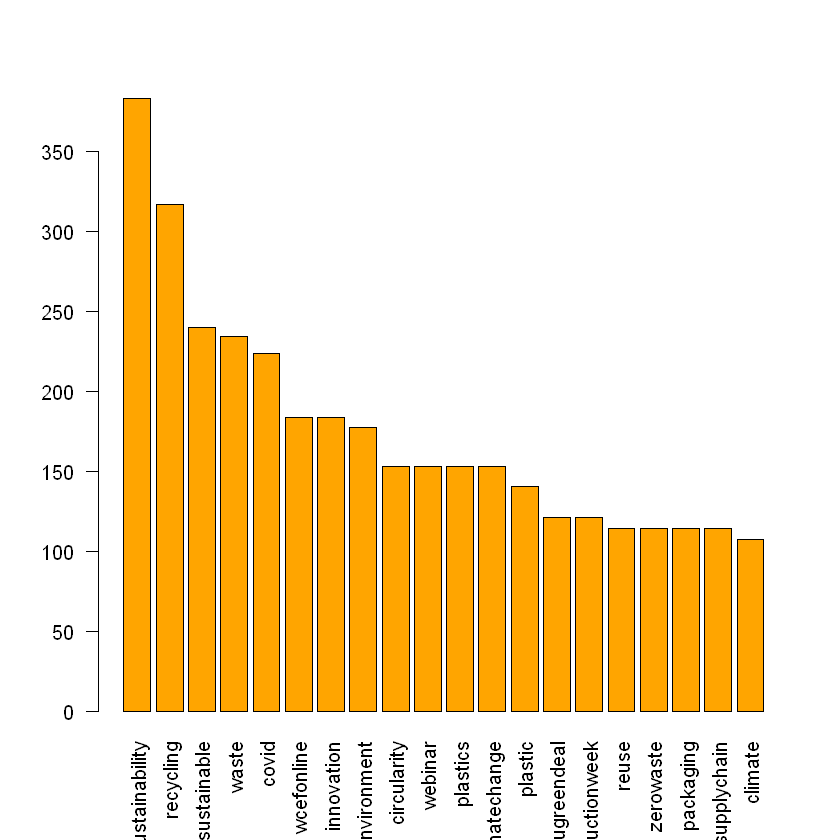

In [61]:
# Barplot of the top 20 most frequent hashtags
barplot(lista_hashtag[1:20], col = "orange", las=2)